<a href="https://colab.research.google.com/github/bekka9/Suicide-prediction-linear-regression-/blob/main/suicide_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Tuple
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import scipy.linalg as sla
import matplotlib.pyplot as plt
import random
import statistics as stat
import scipy.stats
#csv_file_path = '/content/drive/My Drive/data.csv'
#df = pd.read_csv(csv_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
num_suicide = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/num_suicide.xlsx')
alco = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/алко2019-2022.xlsx')
#HIV = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/HIV.xlsx')
cash_income = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/cash_income(mean).xlsx')
healty_lifestyle = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/healty_lifestyle.xlsx')
incomes_below_the_poverty_line = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/incomes_below_the_poverty_line.xlsx')
mental_disorder = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/mental_disorder.xlsx')
num_crimes = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/num_of_criminals.xlsx')
poverty_level = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/poverty_level.xlsx')
rape_num = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/rape.xlsx') #per10000
employee_ratio = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/ratio_of_the_employees_to_the_population_in_working_age.xlsx')

In [67]:
num_crimes

,округ,2018,2019,2020,2021,2022
0,Российская Федерация,931107,884661,852506,848320,818986
1,Белгородская область,6438,6456,6431,6076,6044
2,Брянская область,7266,7048,6899,7057,7050
3,Владимирская область,8338,7120,7089,7031,6860
4,Воронежская область,12491,11427,11123,11925,11461
...,...,...,...,...,...,...
80,Амурская область,9078,7933,7549,7742,7376
81,Магаданская область,1439,1555,1320,1238,1201
82,Сахалинская область,4883,4209,4189,4529,4498
83,Еврейская автономная область,1680,1369,1536,1699,1678


In [68]:
# Числовые признаки
num_cols = [
        'num_suicide',
        'alco',
        'cash_income',
        'mental_disorder',
        'num_crimes',
        'poverty_level',
        'rape_num',
        'employee_ratio'
]
# Категориальные признаки
cat_cols = [
    'district'
]

feature_cols = num_cols + cat_cols
target_col = 'num_suicide'

In [69]:
df2019 = pd.concat([
    num_suicide[['округ']],
    num_suicide[['2019']],
    alco[['2019']],
    cash_income[['2019']],
    incomes_below_the_poverty_line[['2019']],
    mental_disorder[['2019']],
    num_crimes[['2019']],
    poverty_level[['2019']],
    rape_num[['2019']],
    employee_ratio[['2019']]
], axis=1)
df2019.columns = ['district',
        'num_suicide',
        'alco',
        'cash_income',
        'incomes_below_the_poverty_line',
        'mental_disorder',
        'num_crimes',
        'poverty_level',
        'rape_num',
        'employee_ratio']
data = df2019

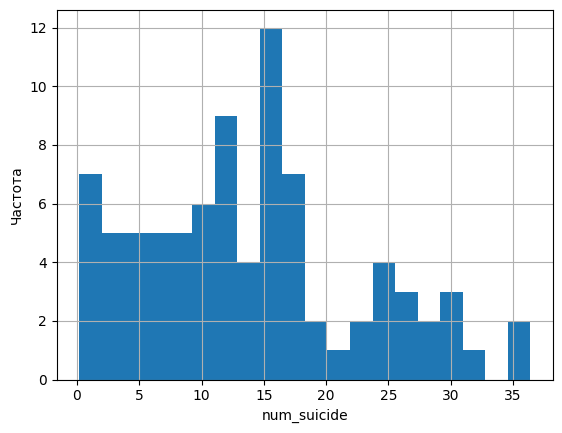

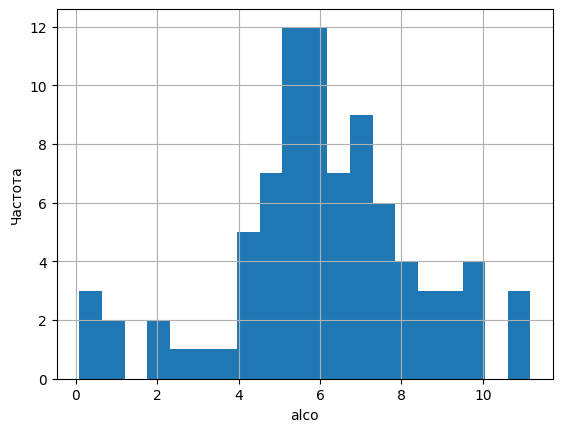

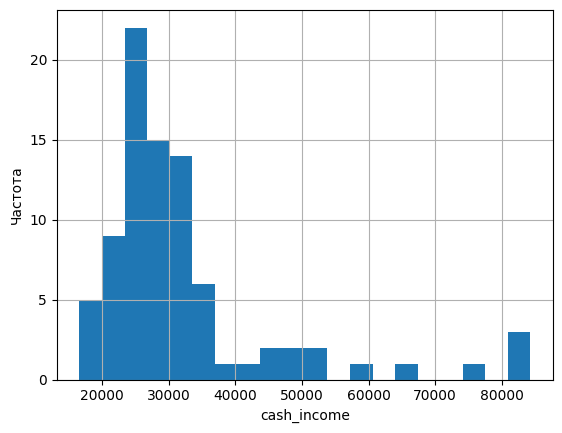

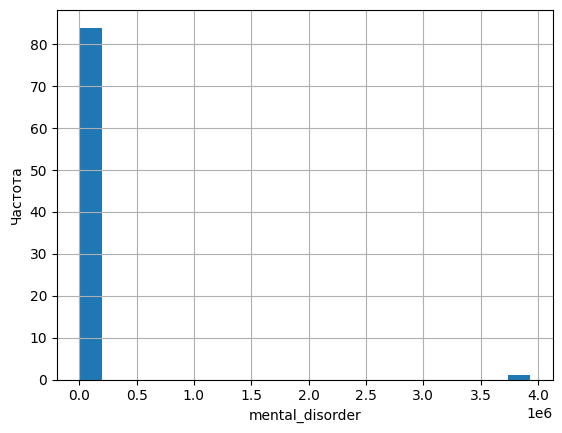

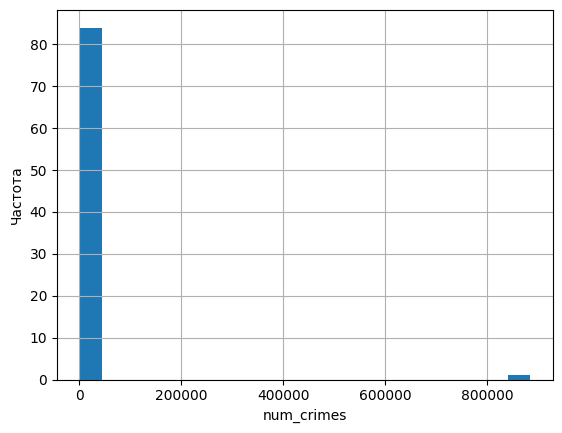

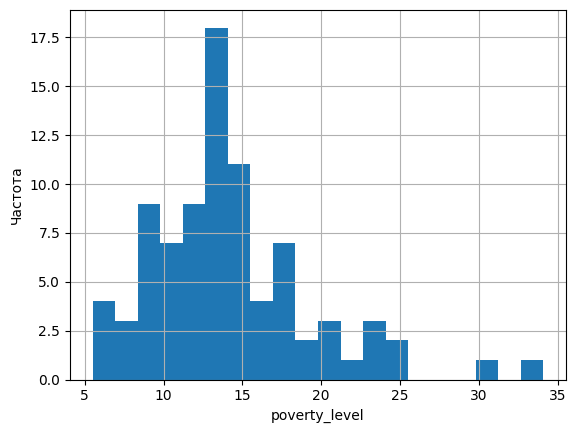

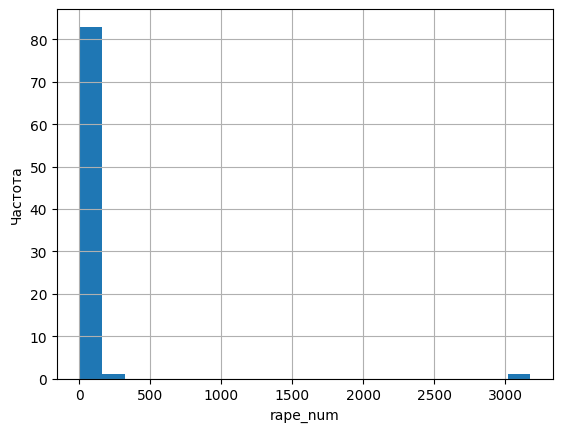

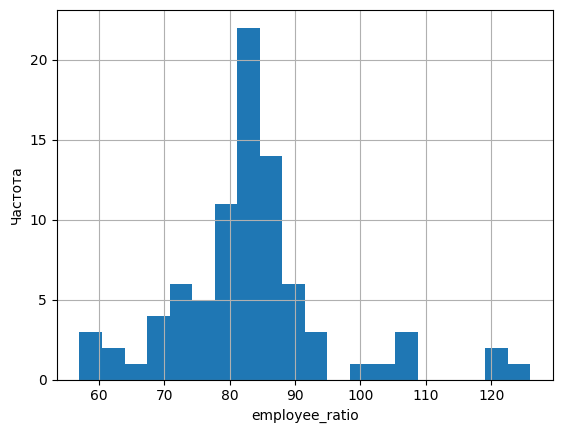

In [70]:
'''Визуализация разброса значений
        на гистограмме'''
for i in range(len(num_cols)):
#  fig = px.histogram(data, x=num_cols[i], histfunc='count')
#  fig.show()
  df2019[num_cols[i]].hist(bins=20)

  plt.xlabel(num_cols[i])
  plt.ylabel('Частота')
  plt.show()

In [71]:
data['num_crimes'].skew()


9.123644847909572

правая часть сильно удлиненна (правосторонняя асимметрия)

0.6691514139126543


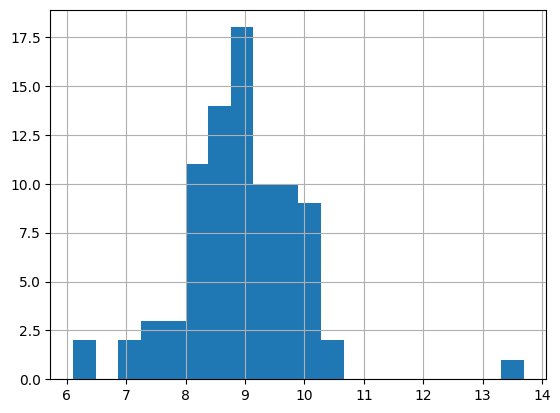

In [72]:
data['num_crimes'].apply(np.log).hist(bins=20)
data['num_crimes'] = data['num_crimes'].apply(np.log)
print(data['num_crimes'].skew())

In [73]:
data['cash_income'].skew()

2.290196791926173

правосторонняя асимметрия

1.2772666361187355


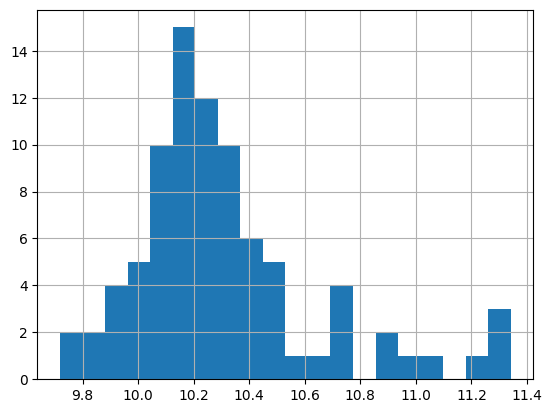

In [74]:
data['cash_income'] = data['cash_income'].apply(np.log)
data['cash_income'].hist(bins=20)
print(data['cash_income'].skew())

In [75]:
data['poverty_level'].skew()

1.214506210843119

-0.030526030981261176


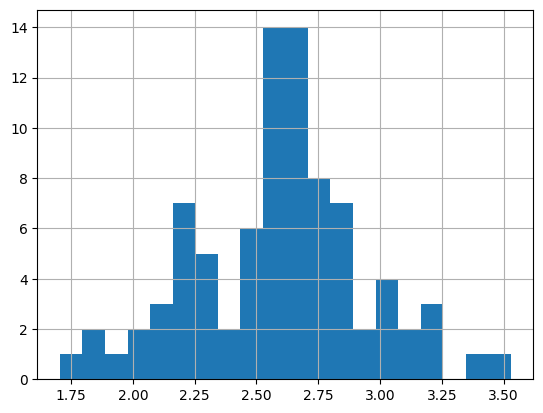

In [76]:
data['poverty_level'] = data['poverty_level'].apply(np.log)
data['poverty_level'].hist(bins=20)
print(data['poverty_level'].skew())

In [77]:
data['employee_ratio'].skew()

1.0931855403799084

0.3327050995879267


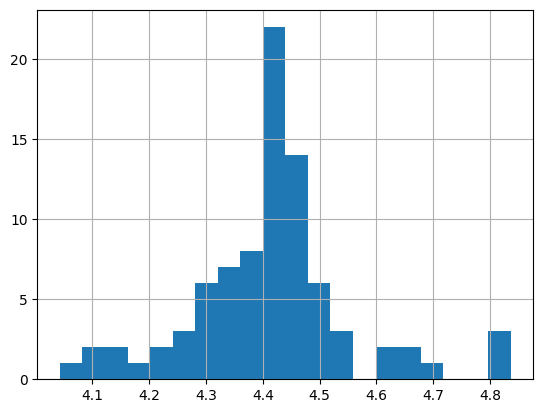

In [78]:
data['employee_ratio'].apply(np.log).hist(bins=20)
data['employee_ratio'] = data['employee_ratio'].apply(np.log)
print(data['employee_ratio'].skew())

In [79]:
data['rape_num'].skew()

9.05074953389023

In [80]:
#data['rape_num'].apply(np.log).hist(bins=1000)
print(data['rape_num'].skew())

9.05074953389023


In [81]:
data['mental_disorder'].skew()

9.088030199503484

0.4731532100635249


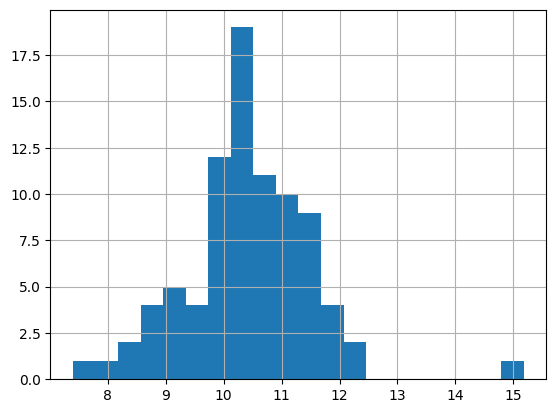

In [82]:
data['mental_disorder'] = data['mental_disorder'].apply(np.log)
data['mental_disorder'].hist(bins=20)
print(data['mental_disorder'].skew())

In [83]:
data['num_suicide'].skew()

0.5276361837342798

In [84]:
data['alco'].skew()

-0.41240067380840595

In [85]:
def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()
def box_plot(x_axis = None, y_axis = None):
    sns.boxplot(x = x_axis, y = y_axis, data = data)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

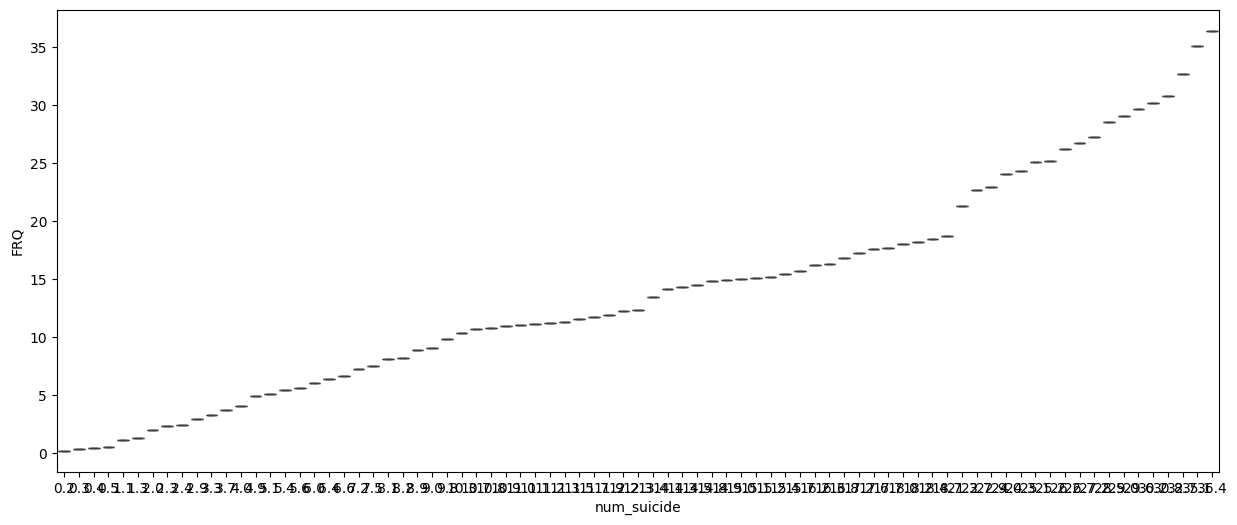

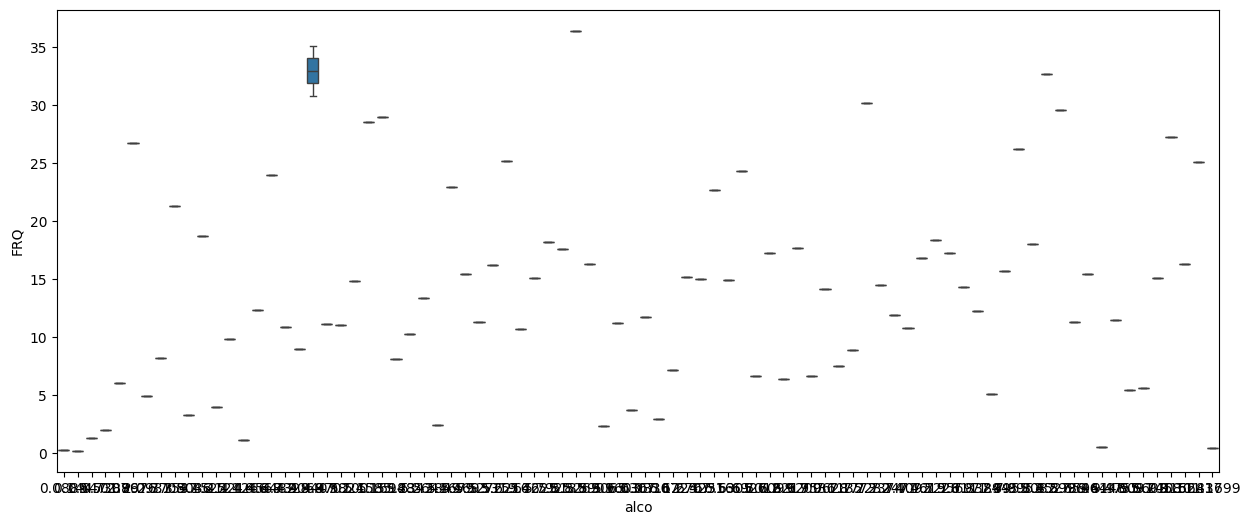

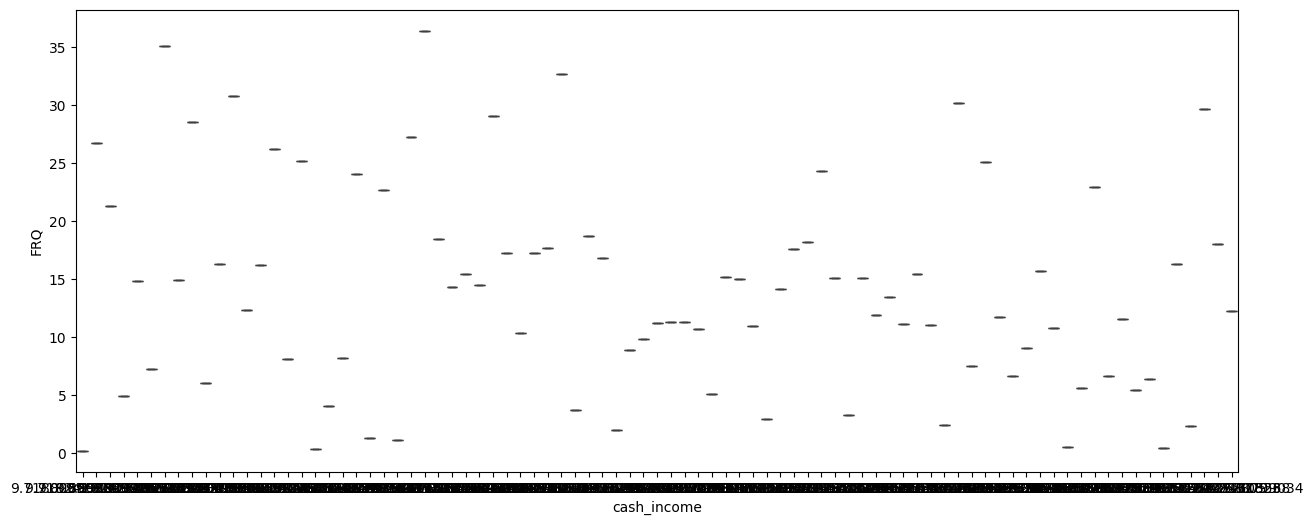

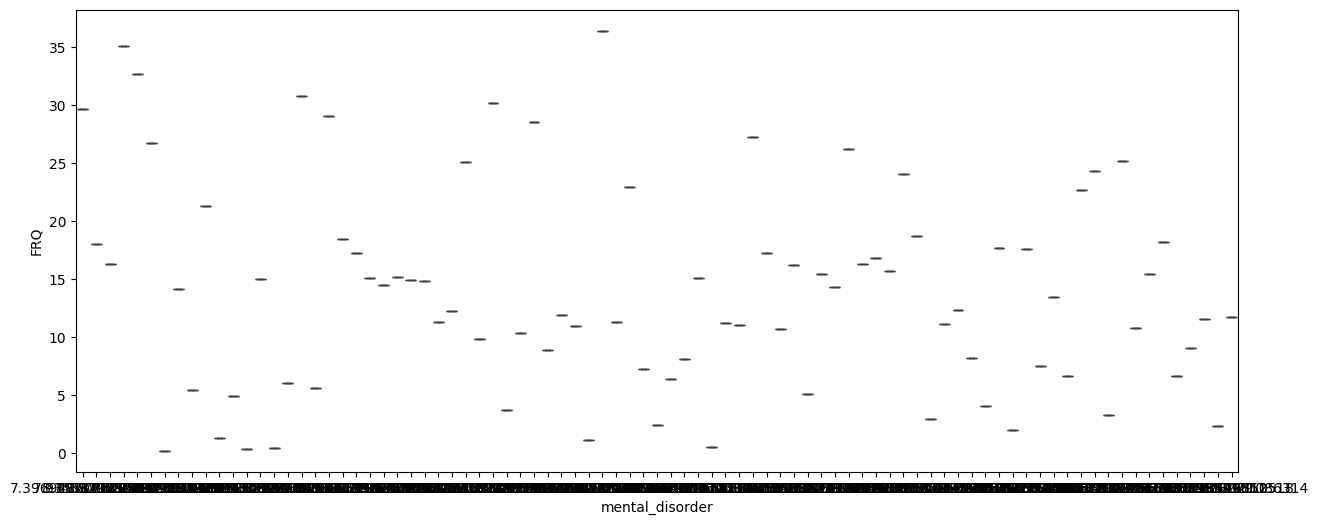

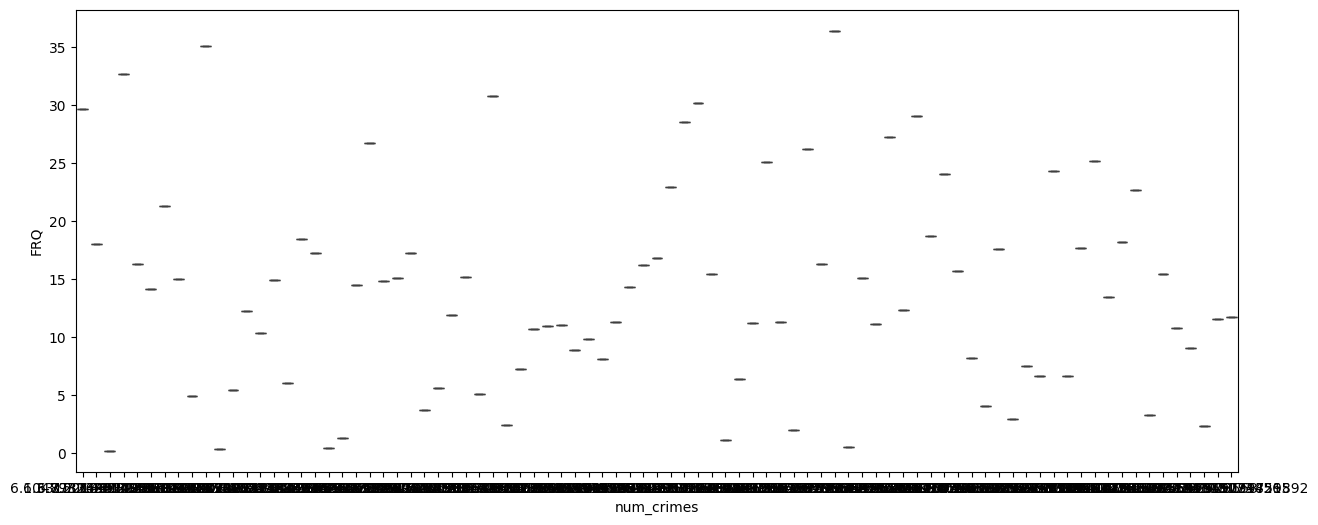

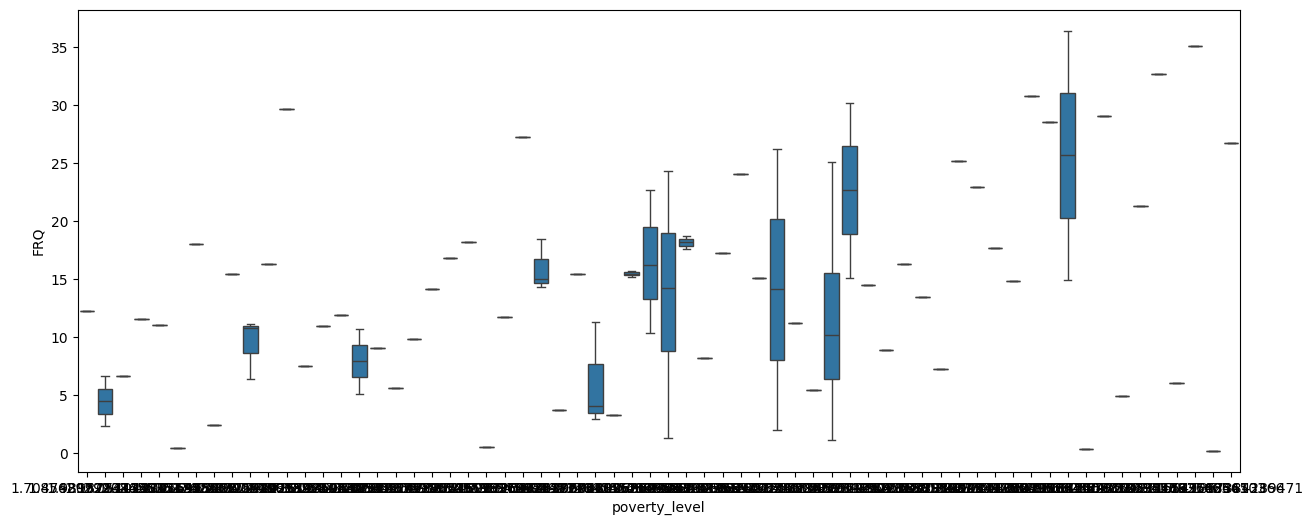

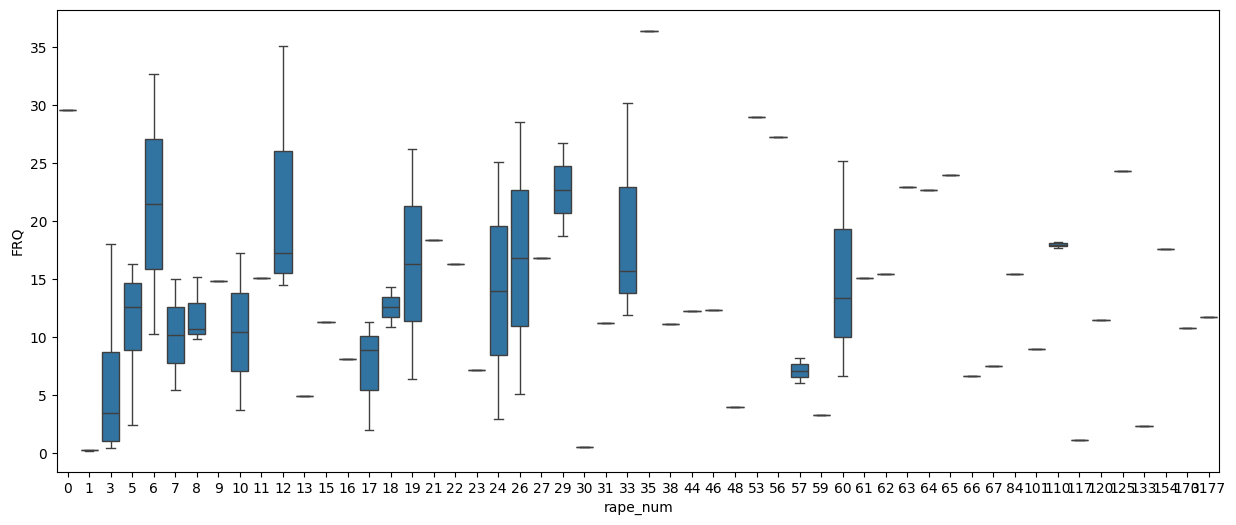

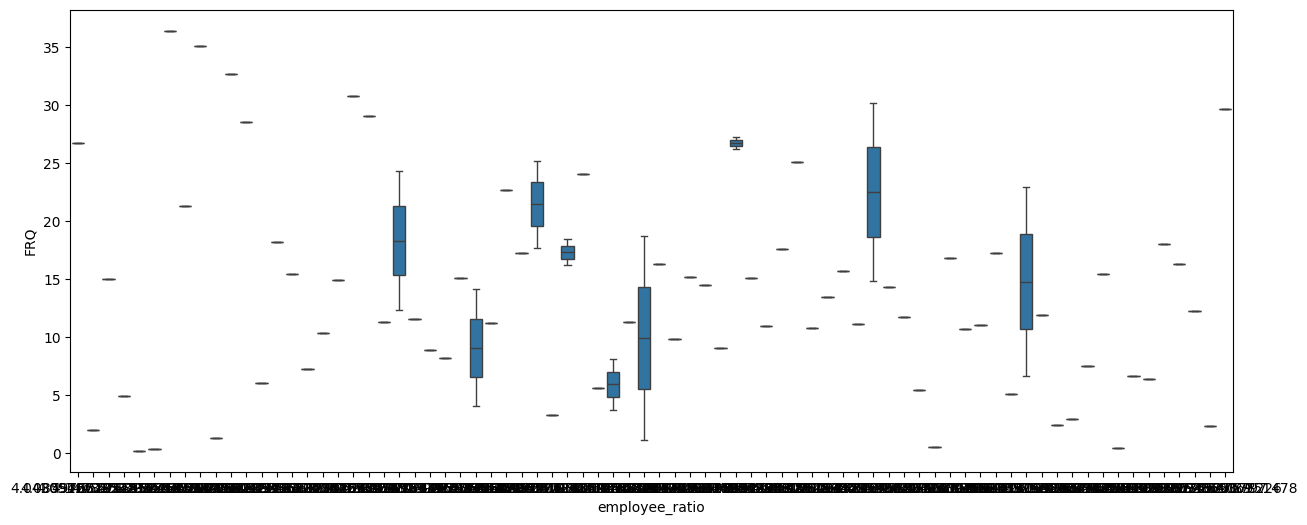

In [86]:
for i in range(len(num_cols)):
  # set figure size
  plt.figure(figsize = (15,6))

  # call function i create it in cell 11
  box_plot(num_cols[i], y_axis = "num_suicide")

In [87]:
sum_counts = data['num_suicide'].value_counts().sort_index()
targetfig = go.Figure(go.Pie(values=sum_counts, labels=sum_counts.index),
                     layout=go.Layout(title=go.layout.Title(text="target")))
targetfig.show()

In [88]:
data

,district,num_suicide,alco,cash_income,incomes_below_the_poverty_line,mental_disorder,num_crimes,poverty_level,rape_num,employee_ratio
0,Российская Федерация,11.7,6.0336,10.477457,12.3,15.185182,13.692960,2.509599,3177,4.461300
1,Белгородская область,11.0,4.9824,10.385852,7.8,10.518619,8.772765,2.054124,5,4.476200
2,Брянская область,11.3,5.5272,10.254919,13.8,10.020426,8.860499,2.624669,17,4.347694
3,Владимирская область,14.3,7.6111,10.142150,12.6,10.690034,8.870663,2.533697,18,4.458988
4,Воронежская область,11.1,4.9702,10.374178,8.9,11.093873,9.343734,2.186051,38,4.454347
...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,30.2,7.2232,10.413433,15.7,10.165583,8.978787,2.753661,33,4.457830
81,Магаданская область,16.3,10.6641,11.087773,9.3,8.191186,7.349231,2.230014,5,4.681205
82,Сахалинская область,0.4,11.1699,10.985564,8.2,9.416948,8.344980,2.104134,3,4.601162
83,Еврейская автономная область,32.7,8.4527,10.188742,23.9,8.709630,7.221836,3.173878,6,4.265493


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   district                        85 non-null     object 
 1   num_suicide                     85 non-null     float64
 2   alco                            85 non-null     float64
 3   cash_income                     85 non-null     float64
 4   incomes_below_the_poverty_line  85 non-null     float64
 5   mental_disorder                 85 non-null     float64
 6   num_crimes                      85 non-null     float64
 7   poverty_level                   85 non-null     float64
 8   rape_num                        85 non-null     int64  
 9   employee_ratio                  85 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.8+ KB


In [90]:
data.duplicated().any()

False

In [91]:
data.describe(include = object)

,district
count,85
unique,85
top,Российская Федерация
freq,1


In [92]:
data.drop(index = 0, inplace = True)
data.reset_index(drop= True , inplace= True )

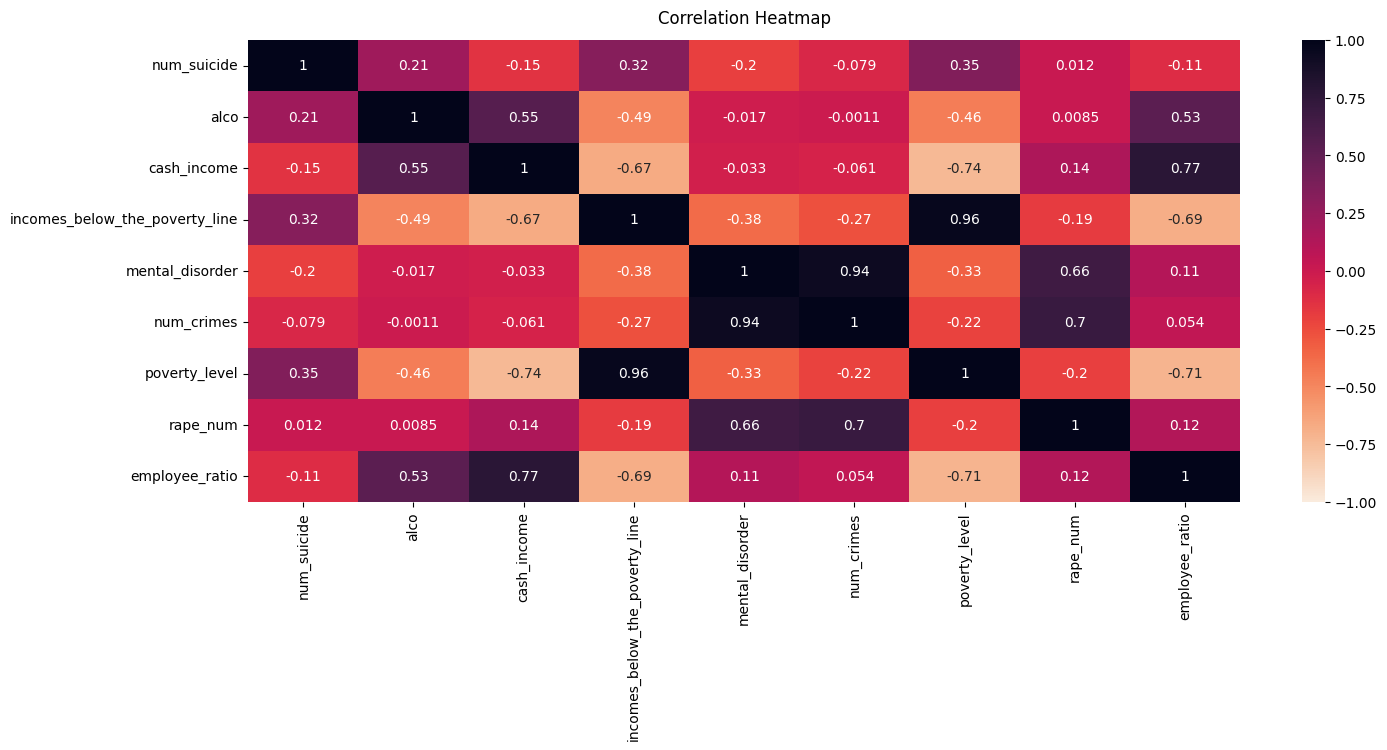

,district,num_suicide,alco,cash_income,incomes_below_the_poverty_line,mental_disorder,num_crimes,poverty_level,rape_num,employee_ratio
0,Белгородская область,11.0,4.9824,10.385852,7.8,10.518619,8.772765,2.054124,5,4.476200
1,Брянская область,11.3,5.5272,10.254919,13.8,10.020426,8.860499,2.624669,17,4.347694
2,Владимирская область,14.3,7.6111,10.142150,12.6,10.690034,8.870663,2.533697,18,4.458988
3,Воронежская область,11.1,4.9702,10.374178,8.9,11.093873,9.343734,2.186051,38,4.454347
4,Ивановская область,17.2,6.7099,10.157897,14.2,10.543498,8.573952,2.653242,12,4.395683


In [93]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.cm.rocket_r)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

data.head()

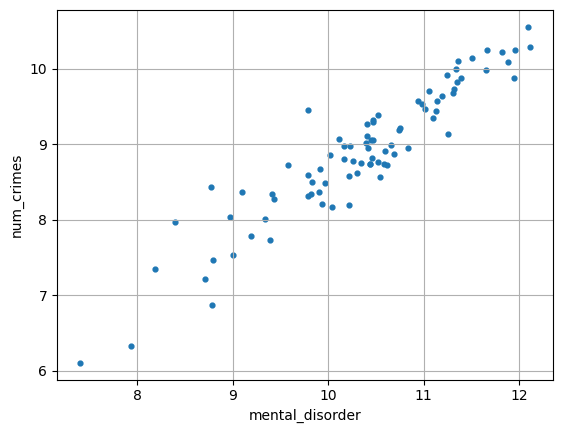

In [94]:
#график рассеяния
xs = data['mental_disorder']#.apply( np.log )
ys = data['num_crimes']#.apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('mental_disorder')
plt.ylabel('num_crimes')
plt.show()

Результат ясно показывает, что между этими двумя переменными имеется связь.

имплементация корреляции Пирсона

In [95]:
print(data['mental_disorder'].corr(data['num_crimes']))

0.9356465287858167


переменные сильно коррелируют

In [96]:
#data.drop(columns = "num_crimes", inplace = True)


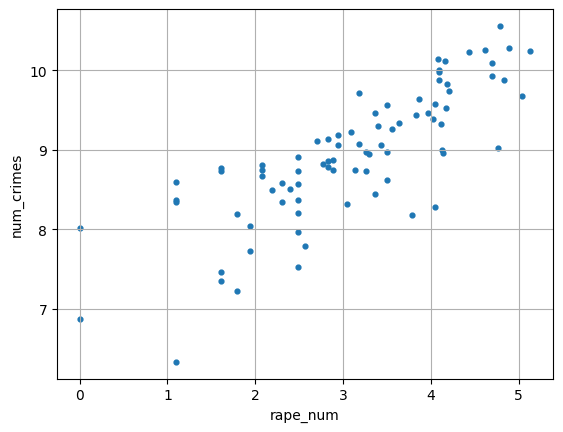

In [97]:
#график рассеяния
xs = data['rape_num'].apply( np.log )
ys = data['num_crimes']#.apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('rape_num')
plt.ylabel('num_crimes')
plt.show()

имплементация корреляции Пирсона

In [98]:
x = data['rape_num']
print(x.corr(data['num_crimes']))

0.7011446801844059


переменные  коррелируют

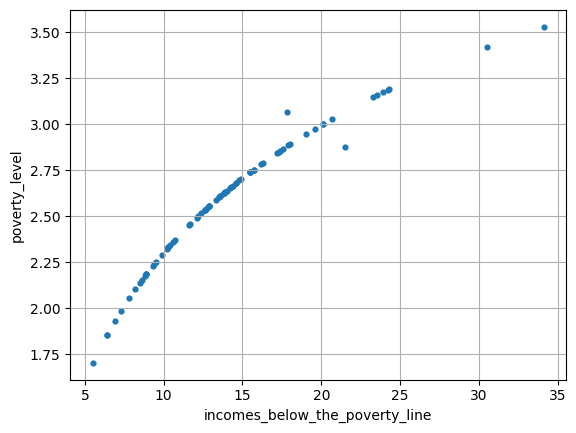

In [99]:
#график рассеяния
xs = data['incomes_below_the_poverty_line']
ys = data['poverty_level']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('incomes_below_the_poverty_line')
plt.ylabel('poverty_level')
plt.show()

In [100]:
print(data['incomes_below_the_poverty_line'].corr(data['poverty_level']))

0.9621247235328894


переменные сильно коррелируют

In [101]:
#

In [102]:
def jitter(limit):
    '''Генератор джиттера (произвольного сдвига точек данных)'''
    return lambda x: random.uniform(-limit, limit) + x
def t_statistic(xs, ys):
    '''Вычисление t-статистики'''
    r = xs.corr(ys)  # как вариант, correlation(xs, ys)
    df = xs.count() - 2
    return r * np.sqrt(df / 1 - r ** 2)
def t_test(xs, ys):
    '''Выполнение двухстороннего t-теста'''
    t_value = t_statistic(xs, ys)
    df = xs.count() - 2
    p = 2 * scipy.stats.t.sf(t_value, df)  # функция выживания
    return {'t-значение':t_value, 'p-значение':p}

In [103]:
t_test(data['incomes_below_the_poverty_line'],data['poverty_level'])

{'t-значение': 8.663093894237235, 'p-значение': 3.3688138265388525e-13}

 Мы вынуждены принять альтернативную гипотезу о существовании корреляции.

In [104]:
data.drop(columns = "incomes_below_the_poverty_line", inplace = True)

In [105]:
t_test(data['rape_num'],data['num_crimes'])

{'t-значение': 6.330074436489531, 'p-значение': 1.2331414173069111e-08}

In [106]:
data.drop(columns = "rape_num", inplace = True)

In [107]:
t_test(data['mental_disorder'],data['num_crimes'])

{'t-значение': 8.427291235284113, 'p-значение': 9.917283607862889e-13}

In [108]:
data.drop(columns = "num_crimes", inplace = True)

In [109]:
t_test(data['cash_income'],data['employee_ratio'])

{'t-значение': 6.978713561142164, 'p-значение': 7.054973677680329e-10}

In [110]:
data.drop(columns = "cash_income", inplace = True)

In [111]:
t_test(data['poverty_level'],data['employee_ratio'])

{'t-значение': -6.445230992257486, 'p-значение': 1.9999999925387852}

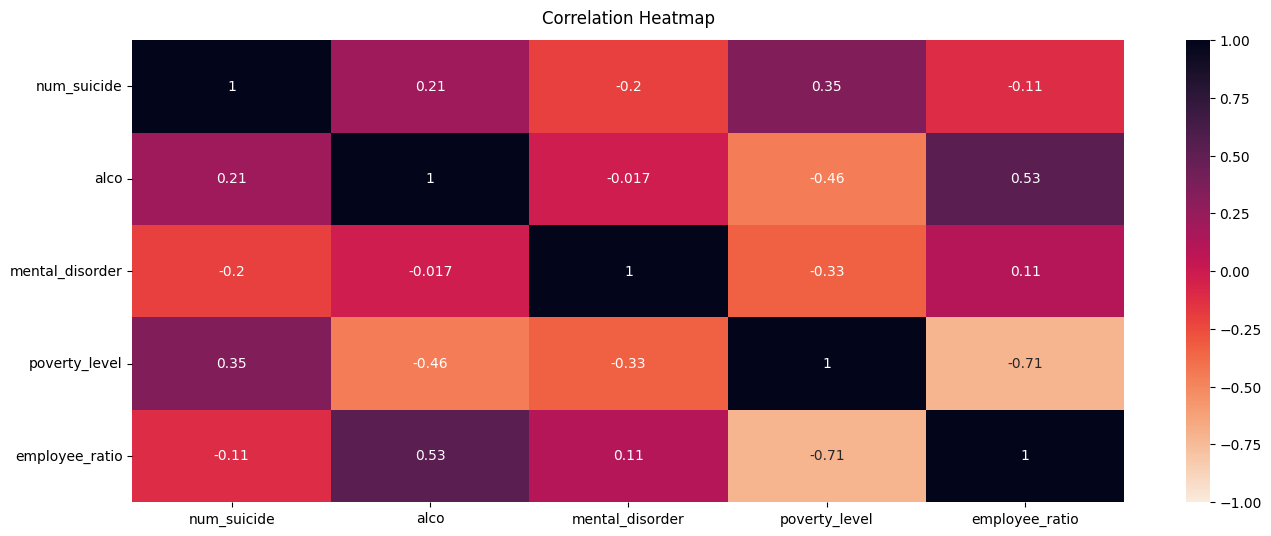

In [112]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.cm.rocket_r)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
'''for i, feature in enumerate(num_cols):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    sns.histplot(
        data=data,
        x=feature,
        ax=ax,
        hue=target_col,
        kde=True,
        bins=50
    )
    ax.set_title(f"распределение целевого признака по столбцу {feature}")
    plt.show()
    print(f"Описательные статистики по столбцу {feature} в зависимости от статуса")
    display(
        data.groupby(target_col)[feature].describe()
    )'''

In [52]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

In [60]:
# Числовые признаки
num_cols = [
        'num_suicide',
        'alco',
        'mental_disorder',
        'poverty_level',
        'employee_ratio'
]

In [55]:
numeric_data = data[num_cols]
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([numeric_data, dummy_features], axis=1)
y = data[target_col]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:,:])
X_valid_scaled = scaler.transform(X_valid[:,:])


X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = num_cols)
X_valid_scaled = pd.DataFrame(data=X_valid_scaled, columns = num_cols)
X_train[:,0:6] = X_train_scaled[num_cols]
#:,0:3
X_valid[:,0:6] = X_valid_scaled[num_cols]


ValueError: Shape of passed values is (67, 89), indices imply (67, 5)

In [ ]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = num_cols)
X_valid_scaled = pd.DataFrame(data=X_valid_scaled, columns = num_cols)
